### Least Mean Squared Error (LMS) Filter

- Part 1: LMS filter
   * A brief introduction.
   * Derivation of formulas.
- Part 2: Code Implementation
   * Add AWGN to a signal.
   * Implemente LMS adaptive filter.
   * Usage Examples.
- Part 3: Adavantages and Disadvantages



#### Part 1: LMS filter

##### A brief introduction
The principle block diagram of an adaptive filter is shown in the following figure. 

The input signal $x(n)$ is passed through a parameter-adjustable digital filter to generate the output signal $y(n)$. It is then compared with the desired signal $d(n)$ to form the error signal $e(n)$. The filter parameters are adjusted using an adaptive algorithm to minimize the mean square value of $e(n)$.

![LMS](./Pic/Adaptive_Filter.jpg)

##### Derivation of formulas

Input signal vector $ x(n) $:
$$ x(n) = [x(n), x(n-1), ..., x(n-L)]^T $$


Output filtered signal $ y(n) $:
$$ y(n) = \Sigma^L_{k=0}w_k(n)x(n-k) $$


The L+1 weight coefficients of the adaptive linear combiner form a vector of weight coefficients, called the weight vector $ w(n) $, denoted by:
$$ w(n) = [w_0(n), w_1(n), ..., w_L(n)]^T $$


Therefore $y(n)$ can also be expressed as:
$$ y(n) = x^T(n)w(n) = x(n)w^T(n)$$


The error signal is:
$$ e(n) = d(n) - y(n) = d(n) - x^T(n)w(n) = d(n) - w^T(n)x(n)$$


According to gradient descent, the iterative formula for computing the weight $w(n)$ is:
$$ w(n+1) = w(n) + 2 \mu e(x) x(n) $$

#### Part 2: Code implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_awgn(signal, snr_dB):
    """
    Add Additive White Gaussian Noise (AWGN) to a signal.

    Parameters:
        signal: 1-D numpy array, the input signal.
        snr_dB: The desired Signal-to-Noise Ratio (SNR) in decibels.

    Returns:
        noisy_signal: 1-D numpy array, the signal with AWGN added.
    """
    # Calculate signal power and noise power based on SNR
    signal_power = np.sum(np.abs(signal)**2) / len(signal)
    # snr_dB = 10 * np.log10(snr)
    snr = 10**(snr_dB / 10.0)
    # snr = signal_power / noise_power
    noise_power = signal_power / snr

    # Generate white Gaussian noise, noise_mean = 0, noise_std = sqrt(noise_power)
    noise = np.random.normal(loc=0, scale=np.sqrt(noise_power), size=len(signal))

    # Add noise to the signal
    noisy_signal = signal + noise

    return noisy_signal

In [3]:
def LMS(input_signal, desired_signal, filter_order, learning_rate):
    """
    LMS adaptive filter implementation.

    Parameters:
        input_signal (numpy array): The input signal with noise.
        desired_signal (numpy array): The desired signal without noise.
        filter_order (int): The order of the adaptive filter.
        learning_rate (float): The step size for the adaptive algorithm.

    Returns:
        filtered_signal (numpy array): The filtered signal without noise.
        W (numpy array): The weight coefficients of the adaptive filter.
        error (numpy array): The error signal (difference between desired and filtered signal).
    """

    itr = len(input_signal)

    # initalize error and W
    error = np.random.uniform(0, 0.1, (itr, 1))
    W = np.random.uniform(0, 0.1, (filter_order, itr))
    
    # error and W can also be initalized like this
    # error = np.zeros((itr, 1))
    # W = np.zeros((filter_order, itr))

    for k in range(filter_order, itr):
        x = input_signal[k - filter_order: k]
        x_reversed = x[::-1]

        try:
            y = W[:, k - 2] @ x
        except:
            pass

        error[k-1] = desired_signal[k-1] - y
        W[:, k-1] = W[:, k - 2] + 2 * learning_rate * error[k-1] * x

    filtered_signal = np.ones(input_signal.shape) * np.nan # make plot easier 

    for k in range(filter_order, len(input_signal)):
        x = input_signal[k - filter_order: k]
        x_reversed = x[::-1]
        filtered_signal[k] = W[:, -2] @ x_reversed

    return filtered_signal, W, error

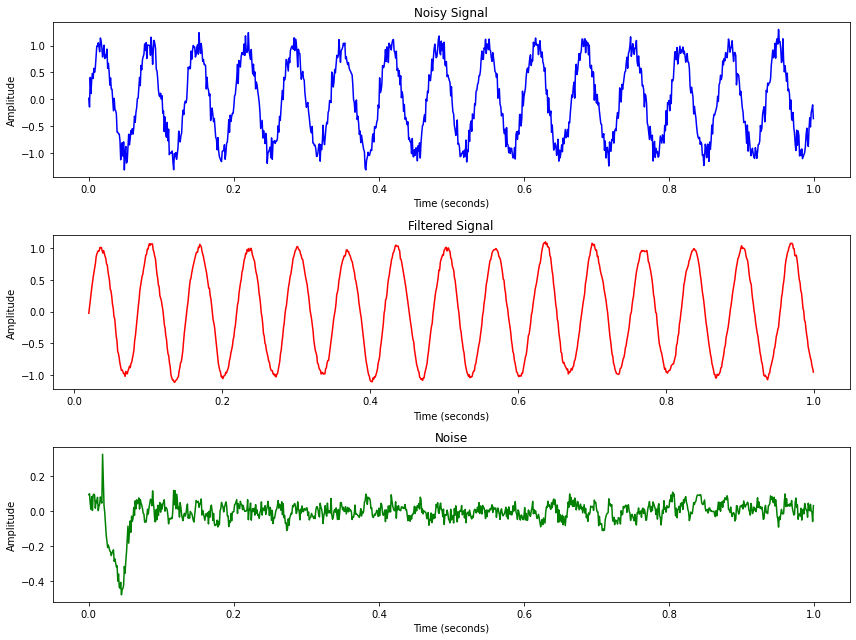

<Figure size 432x288 with 0 Axes>

In [8]:
if __name__ == '__main__':
    
    # Generate time, real_signal, noisy_signal 
    sampling_rate = 1000  # Hz
    t = np.linspace(0, 1, 1 * sampling_rate, endpoint=False)

    frequency = 15  # Hz
    signal = np.sin(2 * np.pi * frequency * t)

    # Add AWGN with SNR of 15 dB
    snr_dB = 15
    noisy_signal = add_awgn(signal, snr_dB)


    # LMS 
    filter_order = 20

    input_signal = noisy_signal
    desired_signal = signal

    learning_rate = 0.01 

    filtered_signal, W, error = LMS(input_signal, desired_signal, filter_order, learning_rate)


    # Plot
    fig, ax = plt.subplots(3, 1, figsize=(12, 9))

    # Plot the Noisy Signal
    ax[0].plot(t, input_signal, 'b')
    ax[0].set_xlabel('Time (seconds)')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Noisy Signal')

    # Plot the Filtered Signal
    ax[1].plot(t, filtered_signal, 'r')
    ax[1].set_xlabel('Time (seconds)')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Filtered Signal')

    # Plot the Noise
    ax[2].plot(t, error, 'g')
    ax[2].set_xlabel('Time (seconds)')
    ax[2].set_ylabel('Amplitude')
    ax[2].set_title('Noise')

    plt.tight_layout()
        plt.savefig('./Pic/Adaptive_Filter_Showcase.jpg', dpi=300)
    plt.show()



#### Part 3: Advantages and Disadavantages:


##### Advantages:
- The algorithm is simple and easy to implement.
- It has low computational complexity, making it efficient for real-time applications.

##### Disadvantages:
- The convergence rate is slow, because the LMS filter coefficients are updated after receiving every new input and desired output pair. 
- As the filter order (or learning rate parameter) increases, system stability decreases. 